# 1. Set up Directories

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [3]:
import os
import pathlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [4]:
train_15fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'train', 'train_15fps'])
print(train_15fps_dir)

train_30fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'train', 'train_30fps'])
print(train_30fps_dir)

train_60fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'train', 'train_60fps'])
print(train_60fps_dir)

val_15fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'val', 'val_15fps'])
print(val_15fps_dir)

val_30fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'val', 'val_30fps'])
print(val_30fps_dir)

val_60fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'val', 'val_60fps'])
print(val_60fps_dir)

test_15fps_dir = os.path.join(*['E:\\', 'CoderSchool_Final_Project', 'super_resolution_video', 'data', 'REDS_VTSR', 'test', 'test_15fps'])
print(test_15fps_dir)

E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\train\train_15fps
E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\train\train_30fps
E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\train\train_60fps
E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\val\val_15fps
E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\val\val_30fps
E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\val\val_60fps
E:\CoderSchool_Final_Project\super_resolution_video\data\REDS_VTSR\test\test_15fps


In [5]:
train_15fps_dir = [os.path.join(train_15fps_dir, p) for p in os.listdir(train_15fps_dir)]
print('Train 15fps', train_15fps_dir[:2])

train_30fps_dir = [os.path.join(train_30fps_dir, p) for p in os.listdir(train_30fps_dir)]
print('Train 30fps', train_30fps_dir[:2])

train_60fps_dir = [os.path.join(train_60fps_dir, p) for p in os.listdir(train_60fps_dir)]
print('Train 60fps', train_60fps_dir[:2])

val_15fps_dir = [os.path.join(val_15fps_dir, p) for p in os.listdir(val_15fps_dir)]
print('Val 15fps', val_15fps_dir[:2])

val_30fps_dir = [os.path.join(val_30fps_dir, p) for p in os.listdir(val_30fps_dir)]
print('Val 30fps', val_30fps_dir[:2])

val_60fps_dir = [os.path.join(val_60fps_dir, p) for p in os.listdir(val_60fps_dir)]
print('Val 60fps', val_60fps_dir[:2])

test_15fps_dir = [os.path.join(test_15fps_dir, p) for p in os.listdir(test_15fps_dir)]
print('Val 15fps', test_15fps_dir[:2])

Train 15fps ['E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\train\\train_15fps\\000', 'E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\train\\train_15fps\\001']
Train 30fps ['E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\train\\train_30fps\\000', 'E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\train\\train_30fps\\001']
Train 60fps ['E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\train\\train_60fps\\000', 'E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\train\\train_60fps\\001']
Val 15fps ['E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\val\\val_15fps\\000', 'E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\val\\val_15fps\\001']
Val 30fps ['E:\\CoderSchool_Final_Project\\super_resolution_video\\data\\REDS_VTSR\\val\\val_30fps\\000', 'E:\\CoderSchool_Final_Project\\super_resolution_video\\data

In [6]:

print([len(os.listdir(i)) for i in train_30fps_dir])

[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]


## 1.1. None Images
in 30 fps and 60 fps folders

In [7]:
image = cv2.imread(os.path.join(train_30fps_dir[0], '00000012.png'))
print(image)
print(os.path.getsize(os.path.join(train_30fps_dir[0], '00000012.png')))

[[[228 173 132]
  [228 173 134]
  [227 172 134]
  ...
  [ 70  89  84]
  [ 79  97  92]
  [ 78  96  91]]

 [[228 173 133]
  [228 173 134]
  [228 173 135]
  ...
  [ 55  77  74]
  [ 56  77  74]
  [ 52  74  70]]

 [[228 173 134]
  [228 173 134]
  [228 172 134]
  ...
  [ 51  76  74]
  [ 60  85  83]
  [ 71  96  94]]

 ...

 [[ 29  39  50]
  [ 30  40  51]
  [ 32  41  53]
  ...
  [ 42  96 100]
  [ 35  89  92]
  [ 34  88  91]]

 [[ 29  39  50]
  [ 29  40  51]
  [ 31  42  53]
  ...
  [ 56 109 114]
  [ 53 107 111]
  [ 57 111 115]]

 [[ 28  39  50]
  [ 30  41  52]
  [ 30  41  51]
  ...
  [ 62 115 120]
  [ 61 114 118]
  [ 67 120 125]]]
1593148


### 1.1.1. Delete None Images

In [8]:
# Only need to run one.
# count = 0

# for folder in [train_30fps_dir, train_60fps_dir, val_30fps_dir, val_60fps_dir]:
#     for paths in folder:
#         paths = pathlib.Path(paths)

#         for p in paths.glob('*'):

#             if cv2.imread(str(p)) is None:
#                 os.remove(str(p))
#                 count+=1
# print(f'Deleted {count} files')
# Deleted 35809 files

## 1.2. Randomize Videos Paths

In [9]:
# [train_30fps_dir, train_60fps_dir, val_30fps_dir, val_60fps_dir]
import random
random.shuffle(train_30fps_dir) # make the training dataset random
random.shuffle(train_60fps_dir) # make the training dataset random

## 1.3. Get Image Paths

In [10]:
# test: all frames of 1 video as 1 element.
# Failed due to unable to flatten tensor objects

# image_30fps_paths = []
# for video_path in train_30fps_dir:
#     image_30fps_paths.append([os.path.join(video_path, x) for x in os.listdir(video_path)])

# output format: [[image1.png, image2.png,...], [image1.png, image2.png,...],...]

In [11]:
image_30fps_paths = []
for video_path in train_30fps_dir:
    for x in os.listdir(video_path):
        image_30fps_paths.append(os.path.join(video_path, x))

# output format: [image1.png, image2.png,...]

# 2. Loading Data

In [186]:
# # test: all frames of 1 video as 1 element.
# # Failed due to unable to flatten tensor objects

# def reverse(image_paths):
#     """
#     Function that randomly reverse frames sequence in 1 video.
#     1 video can only have 2 states: reversed or not reversed.
#     Args:
#         image_paths: Tensor object, list, tuple. The list of paths to frames in the video.
#     Returns:
#         image_paths: The list of paths to frames in the video with reversed order.
#     """
#     method_list = ['reverse', None]
#     reverse_method = random.choice(method_list)
    
#     if reverse_method == 'reverse':
#         image_paths = tf.reverse(image_paths, axis=[0])
        
#     return image_paths

# def flip_method(images):
#     """
#     Function that flip horizontally/vertically all frames in 1 video.
#     Args:
#         images: Tensor object, list, tuple. The list of frames in the video.
#     Returns:
#         images: Tensor object, list, tuple. The list of (unchanged) frames in the video.
#         method: flip or not
#     """ 
# #     flip the image randomly
#     method_list = ['horizontal', 'vertical', None]
#     flip_method = random.choice(method_list)
#     flip_method = np.array([flip_method] * 45)
#     images = tf.squeeze(images)
    
#     return images, flip_method

# image = tf.io.read_file(i)
#         image = tf.image.decode_jpeg(image, channels=3)
#         image = tf.image.convert_image_dtype(image, tf.float32)

# def parse_image(image_paths):
#     """
#     Function that loads the images given the path.
#     Args:
#         image_paths: Tensor object, list, tuple. The list of paths to frames in the video.
#     Returns:
#         image_paths: A tf tensor of the loaded frames.
#     """
#     parsed_images = []
#     print(image_paths)
#     for i in image_paths[0]:
#         print(i)
#         image = tf.io.read_file(i)
#         image = tf.image.decode_jpeg(image, channels=3)
#         image = tf.image.convert_image_dtype(image, tf.float32)
#         print(image)
#         try:
#             parsed_images = tf.stack([parsed_images, image])
#         except:
#             parsed_images = image
# #         parsed_images.append(image)

#     return [parsed_images]



# def high_low_res_pairs(high_res, scale=4):
#     """
#     Function that generates a low resolution image given the 
#     high resolution image.
#     Args:
#         high_res: A tf tensor of the high res image.
#         scale: Int, The downsampling factor, default is 4x.
#     Returns:
#         low_res: A tf tensor of the low res image.
#         high_res: A tf tensor of the high res image.
#     """
#     method_list = ['bilinear', 'lanczos3', 'lanczos5', 'bicubic', 'gaussian', 'nearest', 'area', 'mitchellcubic']
#     downsampling_method = random.choice(method_list)
    
#     low_res = tf.image.resize(high_res, 
#                               [high_res.shape[0] // scale, high_res.shape[1] // scale],
#                               preserve_aspect_ratio=True,
#                               method=downsampling_method)    
#     return low_res, high_res

# def rescale(low_res, high_res):
#     """
#     Function that rescales the pixel values of high_res to the -1 to 1 range.
#     For use with the generator output tanh function.
#     Args:
#         low_res: The tf tensor of the low res image.
#         high_res: The tf tensor of the high res image.
#     Returns:
#         low_res: The tf tensor of the low res image, rescaled.
#         high_res: The tf tensor of the high res image, rescaled.
#     """
#     high_res = high_res * 2.0 - 1.0

#     return low_res, high_res

# def parse_video(video_path, image_paths):
#     """
#     Function that loads frames of the video in given path.
#     Args:
#         video_path: Tensor object that contains path to a video folder.
#     Predefined functions:
#         parse_image
#         high_low_res_pairs
#         rescale
#         reverse
#         flip
#     Returns:
#         low_res: A tf tensor of the low res image.
#         high_res: A tf tensor of the high res image.
#     """
#     low_res_images = []
#     high_res_images = []
    
#     print(video_path)
#     print(image_paths)
# #     print(tf.convert_to_tensor(video_path))
# #     return
# #     video_path format: Tensor("args_0:0", shape=(1,), dtype=string)
# # -> it makes: image_paths = [os.path.join(video_path, x) for x in os.listdir(video_path)] get error

# #     image_paths = [os.path.join(video_path, x) for x in os.listdir(video_path)]
    
#     for i in range(len(image_paths)):
#         image_paths[i] = reverse(image_paths[i])
    
#         for path_to_image in image_paths:

#     #         read image
#             image = parse_image(path_to_image)



#             image = flip(image, method=flip_method)

#     #         low/high res images
#             low_res, high_res = high_low_res_pairs(image, scale=4)
#             low_res, high_res = rescale(low_res, high_res)

#             low_res_images.append(low_res)
#             high_res_images.append(high_res)
    
#     return np.array(low_res_images), np.array(high_res_images)
# #     sample output: [(np.array[low_res_images], np.array[high_res_images]),
# #                     (np.array[low_res_images], np.array[high_res_images]),
# #                     ...]

# # result must be list with shape (1,)
    
    

In [86]:
# 1 image as 1 element

def reverse(ds):
    """
    Function that randomly reverse frames sequence in 1 video.
    Args:
        ds: A tf dataset.
    Returns:
        ds: A tf dataset with reversed frames sequence.
    """ 
#     reverse squence randomly
    method_list = ['reverse', None]
    reverse_method = random.choice(method_list)
    
    image_list = list(ds.as_numpy_iterator())

    if reverse_method == 'reverse':
        image_list.reverse()

    return tf.data.Dataset.from_tensor_slices(image_list)

def parse_image(image_path):
    """
    Function that loads the images given the path.
    Args:
        image_path: The paths to frames in the video.
    Returns:
        image: A tf tensor of the loaded frames.
    """
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    return image

def flip(ds):
    """
    Function that flip horizontally/vertically all images in 1 dataset.
    Args:
        ds: A tf dataset.
    Returns:
        ds: A tf dataset with flipped images.
    """ 
#     flip the image randomly
    method_list = ['horizontal', 'vertical', None]
    flip_method = random.choice(method_list)
    
    def flip_left_right(image):
        image = tf.image.flip_left_right(image)
        return image
    
    def flip_up_down(image):
        image = tf.image.flip_up_down(image)
        return image
    
    if flip_method == 'horizontal':
        ds = ds.map(flip_up_down, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    elif flip_method == 'vertical':
        ds = ds.map(flip_left_right, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        
    return ds

def high_low_res_pairs(ds):
    """
    Function that generates a low resolution image given the high resolution image with random methods.
    Listed methods: ['bilinear', 'lanczos3', 'lanczos5', 'bicubic', 'gaussian', 'nearest', 'area', 'mitchellcubic']
    Default downsampling factor is 4x.
    Args:
        ds: A tf dataset.
    Returns:
        ds: A tf dataset with low and high res images.
    """
    method_list = ['bilinear', 'lanczos3', 'lanczos5', 'bicubic', 'gaussian', 'nearest', 'area', 'mitchellcubic']
    downsampling_method = random.choice(method_list)
    
    scale = 4
    
    def downsampling(high_res):
        """
        Function that generates a low resolution image given the high resolution image.
        Args:
            high_res: A tf tensor of the high res image.
        Returns:
            low_res: A tf tensor of the low res image.
            high_res: A tf tensor of the high res image.
        """
#         print(tf.shape(high_res)[0])
        low_res = tf.image.resize(high_res, 
                                  [720 // scale, 1280 // scale],
                                  preserve_aspect_ratio=True,
                                  method=downsampling_method)   
        return low_res, high_res
    
    ds = ds.map(downsampling, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    return ds

def rescale(low_res, high_res):
    """
    Function that rescales the pixel values of high_res to the -1 to 1 range.
    For use with the generator output tanh function.
    Args:
        low_res: The tf tensor of the low res image.
        high_res: The tf tensor of the high res image.
    Returns:
        low_res: The tf tensor of the low res image, rescaled.
        high_res: The tf tensor of the high res image, rescaled.
    """
    high_res = high_res * 2.0 - 1.0

    return low_res, high_res

def dataset(image_paths, batch_size=45):
    """
    Returns a tf dataset object with specified mappings. No shuffle
    Args:
        image_paths: Str, Path to images.
        batch_size: Int, The number of elements in a batch returned by the dataset.
    Returns:
        dataset: A tf dataset object.
    """
    
    # Generate tf dataset from high res video paths.
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)

    # Prefetch the data for optimal GPU utilization.
    AUTOTUNE = tf.data.experimental.AUTOTUNE

    # apply: Applies a transformation function to the whole dataset as once. Good for functions with the same random arg.

    # randomly reverse frames sequence in 1 video
    dataset = dataset.apply(reverse)

    # image paths to tensor
    dataset = dataset.map(parse_image, num_parallel_calls=AUTOTUNE)

    # randomly flip all frames in 1 video
    dataset = dataset.apply(flip)

    # Generate low resolution by downsampling.
    dataset = dataset.apply(high_low_res_pairs)

    # Rescale the values in the input
    dataset = dataset.map(rescale, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Batch the input, drop remainder to get a defined batch size.
    dataset = dataset.repeat().batch(batch_size, drop_remainder=True).prefetch(AUTOTUNE)

    return dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'High Res')

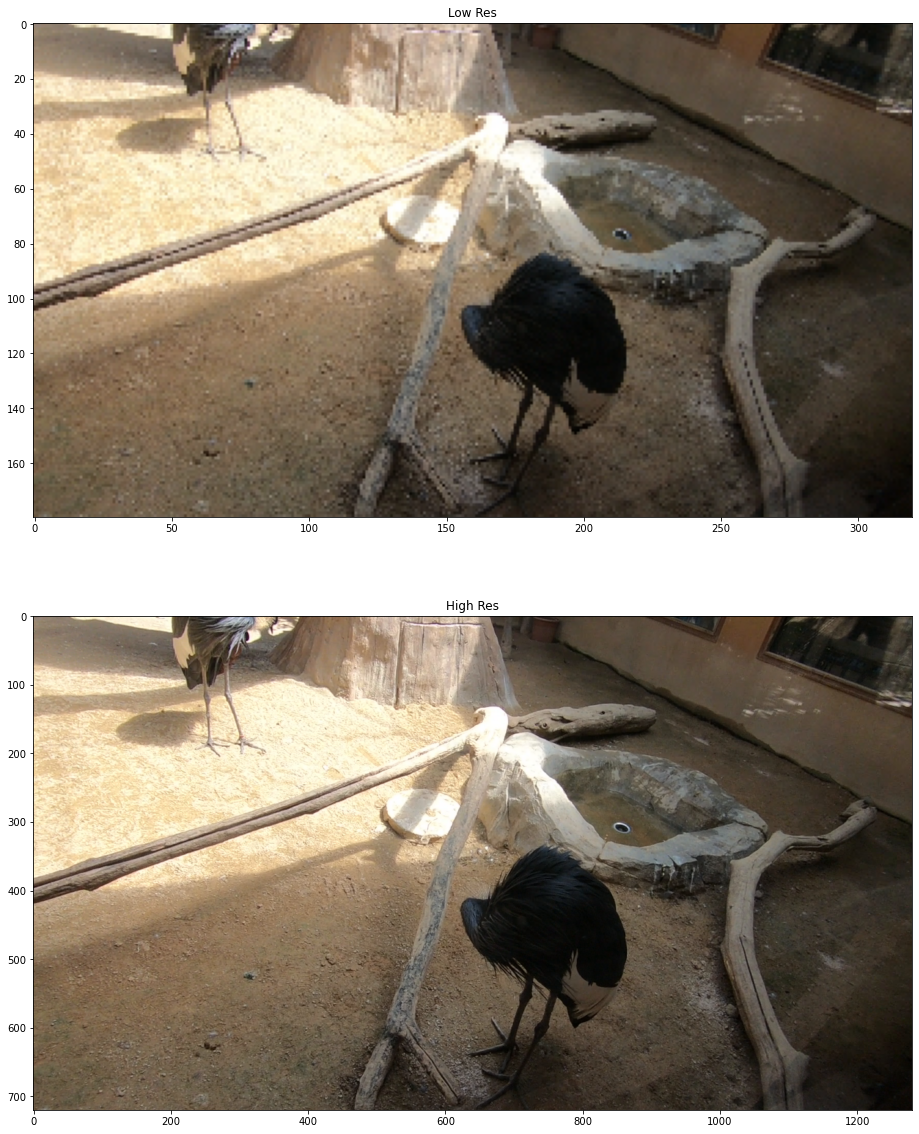

In [14]:
image_test = parse_image(os.path.join(train_30fps_dir[0], '00000012.png'))
low, high = high_low_res_pairs(image_test, scale=4)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))

ax1.imshow(low)
ax1.set_title('Low Res')

ax2.imshow(high)
ax2.set_title('High Res')

In [87]:
dataset = dataset(image_30fps_paths)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


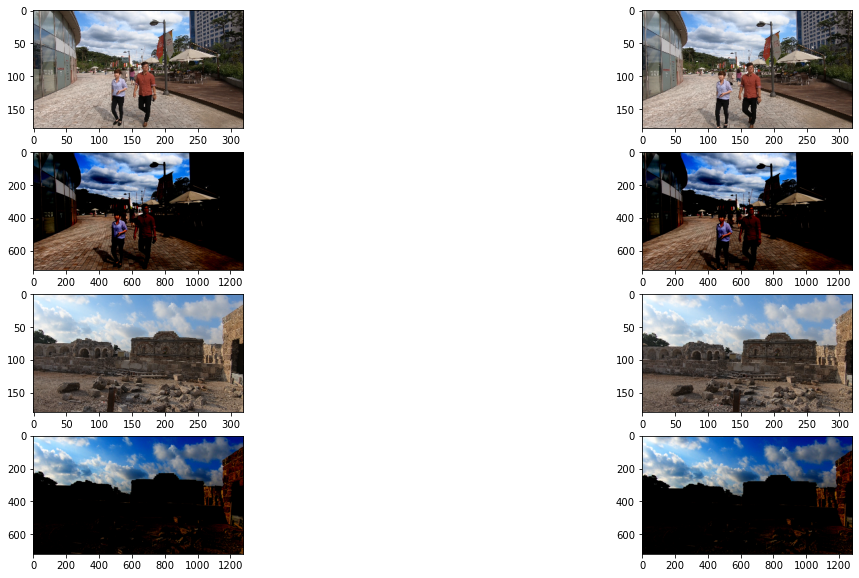

In [89]:
# print(tf.io.read_file(dataset.take(1)[0][0][0]))

f, ax = plt.subplots(4, 2, figsize=(20, 10))
i=0
for f in dataset.take(2):
    for c in f[:2]:
        ax[i][0].imshow(tf.squeeze(c[0]))
        ax[i][1].imshow(tf.squeeze(c[1]))

        i+=1